# Supply Chain Analysis

### Objective: Understand how to improve the effectiveness of the Supply Chain to create more value for the customers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv("supply_chain_data.csv")

In [3]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


### About dataset: The dataset contains the information about Products,Shipping,Manufacturing,Tranportations,etc...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [5]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

### The data is clean

## Revenue analysis

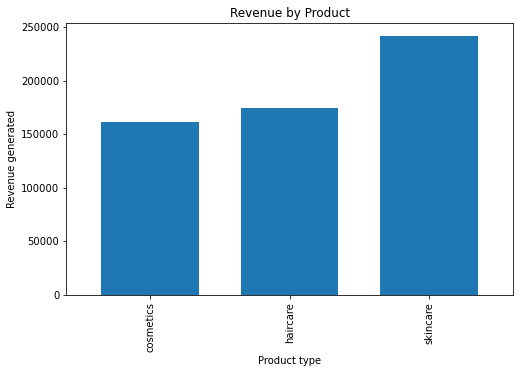

In [85]:
plt.figure(figsize=(8,5))
revenue=df.groupby("Product type").sum()["Revenue generated"].plot(kind="bar",width=0.7)
plt.title("Revenue by Product")
plt.ylabel("Revenue generated")
plt.show()

* OBSERVATIONS
   * The highest revenue is coming from skincare products
   * Cosmetic products has the lowest income
 

## How? is the revenue depend on price / no.of products sold

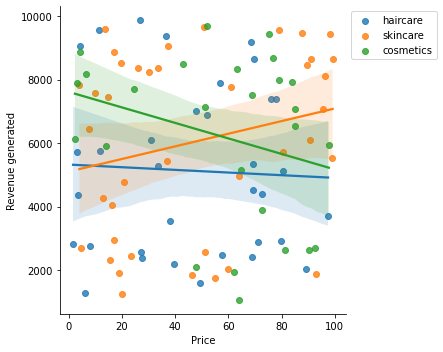

In [54]:
sb.lmplot(data=df,x="Price",
                    y="Revenue generated",
                    hue="Product type",legend=False)
plt.legend(loc="upper left",bbox_to_anchor=(1, 1))                   
plt.show()

* OBSRVATIONS
  * The trend line shows skincare products price is higher than other products
  * If the price is increase the revenue will also increase

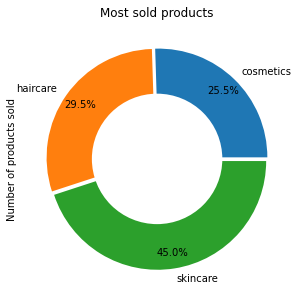

In [200]:
explode = (0.02, 0.02, 0.02)
plt.figure(figsize=(10,5))
df.groupby("Product type").sum()["Number of products sold"].plot(kind="pie", autopct='%1.1f%%',pctdistance=0.85,explode=explode)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Most sold products")
plt.show()

* OBSERVATIONS
  * The green part shows skincare products
  * Skin care products are most sold products which is 45%
### The skincare products revenue is coming from both  price and sold

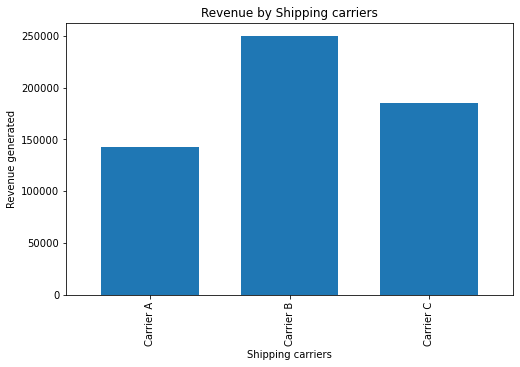

In [94]:
plt.figure(figsize=(8,5))
df.groupby("Shipping carriers")["Revenue generated"].sum().plot(kind="bar",width=0.7)
plt.ylabel("Revenue generated")
plt.title("Revenue by Shipping carriers")
plt.show()

## Shipping and transportation

In [8]:
df["Shipping carriers"].value_counts()

Carrier B    43
Carrier C    29
Carrier A    28
Name: Shipping carriers, dtype: int64

In [10]:
df["Transportation modes"].value_counts()

Road    29
Rail    28
Air     26
Sea     17
Name: Transportation modes, dtype: int64

In [205]:
avg_shipping_time = df.groupby('Shipping carriers')['Shipping times'].mean().reset_index()
print(avg_shipping_time)

  Shipping carriers  Shipping times
0         Carrier A        6.142857
1         Carrier B        5.302326
2         Carrier C        6.034483


In [92]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


* OBSERVATIONS
  * The average shipping time of carriers B is lower
  * The average lead time by products,cosmetics has low lead time than others
  * The avg Manufacturing costs of cosmetics also low than others

## SKU analysis

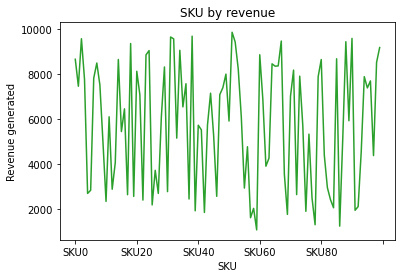

In [177]:
df.plot(x="SKU",y="Revenue generated",color="tab:green",legend=False)
plt.ylabel("Revenue generated")
plt.title("SKU by revenue")
plt.show()

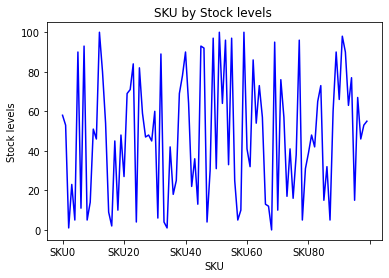

In [181]:
df.plot(x="SKU",y="Stock levels",color="b",legend=False)
plt.ylabel("Stock levels")
plt.title("SKU by Stock levels ")
plt.show()

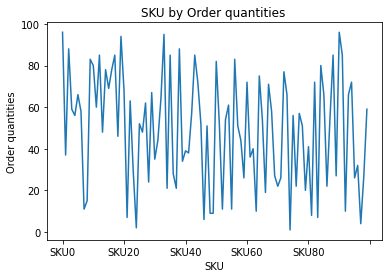

In [149]:
df.plot(x="SKU",y="Order quantities",legend=False)
plt.ylabel("Order quantities")
plt.title("SKU by Order quantities ")
plt.show()

### The above charts showing the analysis of stok keeping units(SKU)
* How much revenue got by each sku
* The stock levels of sku
* The size orders done by each sku

## Cost analysis

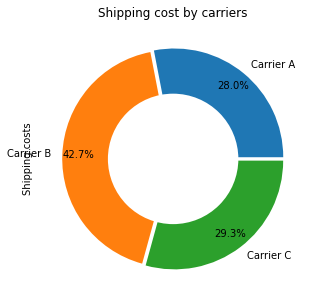

In [175]:
explode = (0.02, 0.02, 0.02)
plt.figure(figsize=(10,5))
df.groupby("Shipping carriers").sum()["Shipping costs"].plot(kind="pie", autopct='%1.1f%%',pctdistance=0.85,explode=explode)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Shipping cost by carriers")
plt.show()

* OBSERVATIONS
  * Carrier B is causing the high shipping cost

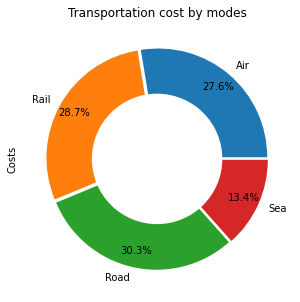

In [176]:
explode = (0.02, 0.02, 0.02,0.02)
plt.figure(figsize=(10,5))
df.groupby("Transportation modes").sum()["Costs"].plot(kind="pie", autopct='%1.1f%%',pctdistance=0.85,explode=explode)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Transportation cost by modes")
plt.show()

* OBSERVATIONS
  * We can see the transportation cost is depend on transportation mode
  * Sea transportations causing low transportation costs
  * Road transportations casing high transportation costs

<AxesSubplot:xlabel='Shipping carriers,Transportation modes'>

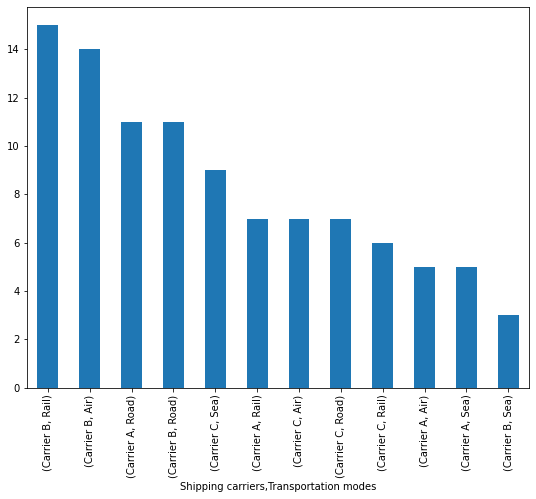

In [18]:
plt.figure(figsize=(9,7))
df[["Shipping carriers","Transportation modes"]].value_counts().plot(kind="bar")

* OBSERVATIONS
  * Carrier B is rail and Air 

## Defect rate analysis

In [206]:
data=df.groupby('Product type')['Defect rates'].mean()
print(data)

Product type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: Defect rates, dtype: float64


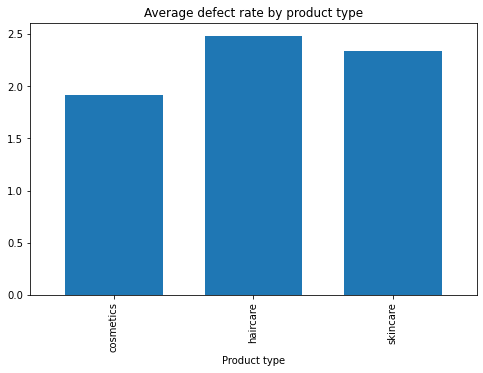

In [194]:
plt.figure(figsize=(8,5))
df.groupby('Product type')['Defect rates'].mean().plot(kind="bar",width=0.7)
plt.title("Average defect rate by product type")
plt.show()

In [207]:
df.groupby("Transportation modes")['Defect rates'].mean()

Transportation modes
Air     1.823924
Rail    2.318814
Road    2.620938
Sea     2.315281
Name: Defect rates, dtype: float64

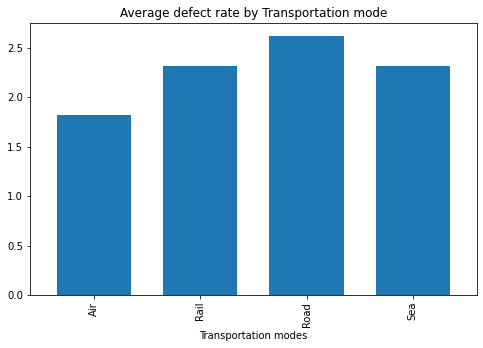

In [198]:
plt.figure(figsize=(8,5))
df.groupby("Transportation modes")['Defect rates'].mean().plot(kind="bar",width=0.7)
plt.title("Average defect rate by Transportation mode")
plt.show()

* OBSERVATIONS
  * The defect rate of cosmetics is low
  * The defect rate of road tranportation is high
  * The defect rate of air is low